In [1]:
import pandas as pd 
import numpy as np 

In [2]:
df = pd.read_csv('cleaned_data.csv')
df.head()

,price,kms_driven,owner,age,power,brand
0,35000.0,17654.0,1,3,110.0,8
1,65000.0,16329.0,1,4,180.0,8
2,80000.0,10000.0,1,3,150.0,5
3,53499.0,25000.0,1,6,150.0,5
4,85000.0,8200.0,1,3,160.0,6


In [4]:
x = df.drop('price',axis=1)
y = df['price']

In [13]:
x.head()

,kms_driven,owner,age,power,brand
0,17654.0,1,3,110.0,8
1,16329.0,1,4,180.0,8
2,10000.0,1,3,150.0,5
3,25000.0,1,6,150.0,5
4,8200.0,1,3,160.0,6


In [14]:
y

0         35000.0
1         65000.0
2         80000.0
3         53499.0
4         85000.0
           ...   
17720     25000.0
17721    123000.0
17722     30000.0
17723     60000.0
17724     22000.0
Name: price, Length: 17725, dtype: float64

In [15]:
x = np.array(x)
y = np.array(y)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
# from tensorflow.keras.layers import Dense
import tensorflow
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential

In [43]:
y = np.expand_dims(y,axis=1)

In [44]:
x.shape  , y.shape

((17725, 5), (17725, 1))

In [62]:
# model defining
model = Sequential()
model.add(Dense(units=256,activation='relu',input_dim=5))
model.add(Dropout(0.2))
model.add(Dense(units=128 , activation='relu'))
model.add(Dense(units=64 , activation='relu'))
model.add(Dense(units=1,activation='linear'))

model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae', 'mse'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 256)               1536      
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_30 (Dense)            (None, 128)               32896     
                                                                 
 dense_31 (Dense)            (None, 64)                8256      
                                                                 
 dense_32 (Dense)            (None, 1)                 65        
                                                                 
Total params: 42753 (167.00 KB)
Trainable params: 42753 (167.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [80]:
history = model.fit(x_train,np.expand_dims(y_train,axis=1),epochs=50)

In [64]:
history = pd.DataFrame(history.history)
history

,loss,mae,mse
0,1.256311e+09,25672.218750,1.256311e+09
1,3.286035e+08,13011.210938,3.286035e+08
2,2.999136e+08,12298.714844,2.999136e+08
3,2.799611e+08,12038.364258,2.799611e+08
4,2.655886e+08,11852.470703,2.655886e+08
5,2.464440e+08,11318.947266,2.464440e+08
6,2.434795e+08,11259.421875,2.434795e+08
7,2.254371e+08,10700.741211,2.254371e+08
8,2.226819e+08,10654.421875,2.226819e+08
9,2.227050e+08,10591.229492,2.227050e+08


In [49]:
import matplotlib.pyplot as plt 

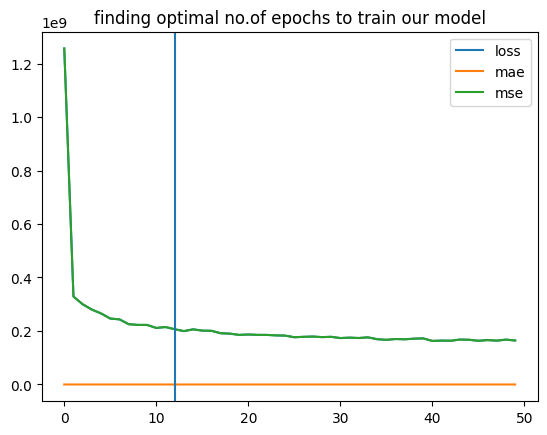

In [65]:
history.plot()
plt.axvline(12)
plt.title("finding optimal no.of epochs to train our model")
plt.show()

In [66]:
history2 = model.fit(x_train,y_train,epochs=12,validation_data=(x_test,y_test))

Epoch 1/12
444/444 [==============================] - 4s 6ms/step - loss: 163001904.0000 - mae: 8744.8594 - mse: 162862416.0000 - val_loss: 184589504.0000 - val_mae: 10296.2402 - val_mse: 184589504.0000
Epoch 2/12
444/444 [==============================] - 2s 5ms/step - loss: 159457072.0000 - mae: 8605.8398 - mse: 159294000.0000 - val_loss: 145301920.0000 - val_mae: 7941.7710 - val_mse: 145301920.0000
Epoch 3/12
444/444 [==============================] - 2s 5ms/step - loss: 165348880.0000 - mae: 8831.5957 - mse: 165477680.0000 - val_loss: 161669536.0000 - val_mae: 8161.0122 - val_mse: 161669536.0000
Epoch 4/12
444/444 [==============================] - 2s 5ms/step - loss: 160731744.0000 - mae: 8656.3740 - mse: 160708208.0000 - val_loss: 138787472.0000 - val_mae: 7552.8789 - val_mse: 138787472.0000
Epoch 5/12
444/444 [==============================] - 3s 6ms/step - loss: 161199536.0000 - mae: 8701.7588 - mse: 162068912.0000 - val_loss: 201383648.0000 - val_mae: 10861.5000 - val_mse: 201

In [67]:
history2 = pd.DataFrame(history2.history)
history2

,loss,mae,mse,val_loss,val_mae,val_mse
0,163001904.0,8744.859375,162862416.0,184589504.0,10296.240234,184589504.0
1,159457072.0,8605.839844,159294000.0,145301920.0,7941.770996,145301920.0
2,165348880.0,8831.595703,165477680.0,161669536.0,8161.012207,161669536.0
3,160731744.0,8656.374023,160708208.0,138787472.0,7552.878906,138787472.0
4,161199536.0,8701.758789,162068912.0,201383648.0,10861.500000,201383648.0
5,164578368.0,8797.310547,164468368.0,146858784.0,8006.402832,146858784.0
6,161866192.0,8722.611328,161732656.0,141252000.0,7370.966309,141252000.0
7,162076480.0,8696.466797,161857104.0,166455920.0,9050.236328,166455920.0
8,164019328.0,8728.041992,163854800.0,136159632.0,7954.915039,136159632.0
9,165982576.0,8862.055664,166028624.0,144221920.0,8070.331543,144221920.0


<Axes: >

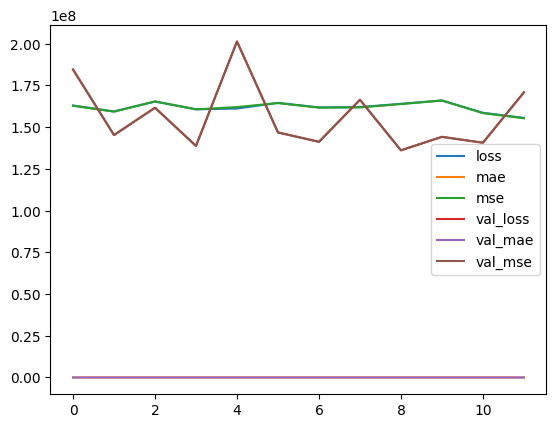

In [68]:
history2.plot()

In [69]:
pred = model.predict(x_test)

111/111 [==============================] - 1s 3ms/step


In [79]:
comparison_df = pd.DataFrame({'actual':y_test.ravel(),'prediction':pred.ravel()})


In [78]:
comparison_df.describe()

,actual,prediction
count,3545.00000,3545.000000
mean,46807.51086,40497.468750
std,27485.60963,24787.304688
min,5800.00000,3476.530029
25%,25000.00000,22006.910156
50%,43000.00000,33275.609375
75%,60000.00000,57407.378906
max,160000.00000,166983.562500
